## 前情提要
锂离子电池是一种利用锂离子在正负极之间往返移动来储存和释放能量的电化学储能器件。锂离子电池的
性能取决于正负极的活性物质、隔膜的孔隙度和电解液的成分等因素。其中，正极活性物质是影响锂离子
电池能量密度、循环寿命和倍率性能的重要因素之一。钴酸锂(LCo02)是一种常用的正极活性物质，
具有高能量密度和高工作电压等优点，但也存在结构不稳定、容易析氧、成本高昂等缺点。因此，研究人
员通过掺杂、涂层、形貌控制等方法对钴酸锂进行改性，以提高其电化学性能。
为了建立钴酸锂物化性质和电化学性能之间的数学模型，我们需要首先了解钴酸锂的结构和反应机理。钴
酸锂是一种层状氧化物，其结构由交替排列的L0层和C0-0层组成，每个C0原子被六个0原子包围形成八
面体，每个L原子被六个0原子包围形成三角形棱柱。在充放电过程中，L离子从L0层中脱出或嵌入，而
Co原子保持不变。当充电截止电压提高时，离子从Li0层中脱出更多，导致C0-0层中Co3+氧化为
C04+,同时部分02-还原为02气体逸出，造成晶体结构的坍塌和容量的衰减。1
根据附表1~4的实验数据，我们可以使用多元线性回归(MLR)方法来建立物化性质（元素含量和粒径）
与循环性能或倍率性能之间的统计模型。L方法是一种常用的数学建模方法，它假设因变量（如容量
保特率)与自变量（如元素含量和粒径）之间存在线性关系，并通过最小二乘法求解回归系数。MLR方
法的优点是简单易行，可以快速得到结果；缺点是可能忽略了非线性效应和交互作用效应。

## 题目一

从回归结果可以看出，两个模型的R2值都非常接近1，说明模型拟合效果很好。回归系数的正负号表示
自变量对因变量的影响方向，绝对值表示影响程度。从回归系数可以看出，影响钴酸锂循环性能的主要因
素有：
1、掺杂元素：T、Mg、A三种掺杂元素对循环性能有正向影响，即掺杂越多，容量保持率越高。这可能
是因为掺杂元素可以稳定钴酸锂的晶体结构，抑制析氧和结构坍塌的发生。其中，八元素的影响最
大，T和Mg元素的影响次之。
2、杂质元素：Fe、Cu、Zr、Ca、K、Na、Cr等杂质元素对循环性能有负向影响，即杂质越多，容量保特
率越低。这可能是因为杂质元素会破坏钴酸锂的晶体结构，降低其电化学活性。其中，N元素的影响
最大，Fe、Cu、Zr、Ca、K、Cr元素的影响次之。
3、粒径：D10和D50两种粒径参数对循环性能有负向影响，即粒径越大，容量保持率越低。这可能是因
为粒径越大，颗粒表面积越小，L离子的扩散速率越慢，电池的内阻越大。其中，D50参数的影响大
于D10参数。

In [54]:
from pandas import DataFrame
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [55]:
df1 = pd.read_excel("C:/Users/king/Desktop/参考文件/附表 1 元素含量.xlsx",index_col=0)
df2 = pd.read_excel("C:/Users/king/Desktop/参考文件/附表 2 粒径（激光粒度仪测试结果）.xlsx",index_col=0)
df3 = pd.read_excel("C:/Users/king/Desktop/参考文件/附表 3 循环性能.xlsx",index_col=0)
df4 = pd.read_excel("C:/Users/king/Desktop/参考文件/附表 4 倍率性能.xlsx",index_col=0)

In [56]:
df1.head()

,Bare,Ti-doped,Mg-doped,Al-doped,TMA-doped
Ti,NaN,0.0843,NaN,NaN,0.0911
Mg,NaN,NaN,0.0883,NaN,0.0886
Al,NaN,NaN,NaN,0.0597,0.0786
Zn,0.0001,0.0003,0.0003,0.0002,0.0004
Ni,0.0017,0.0017,0.0010,0.0013,0.0018


In [57]:
df2.head()

,Bare,Ti-doped,Mg-doped,Al-doped,TMA-doped
D10,8.35,7.58,8.62,8.21,7.91
D50,16.10,15.22,16.61,15.86,15.29


In [58]:
df3.head()

,Bare,Ti-doped,Mg-doped,Al-doped,TMA-doped
50 周,0.711,0.835,0.793,0.876,0.917
100 周,0.525,0.742,0.701,0.835,0.876


In [59]:
df4.head()

,Bare,Ti-doped,Mg-doped,Al-doped,TMA-doped
0.2C,208.7,208.7,193.4,182.6,210.8
0.5C,121.7,176.1,158.7,141.3,197.8
1C,52.1,143.5,78.2,95.6,171.7
2C,15.2,95.6,21.7,50.1,147.8


In [60]:
median_values = df1.median()
df1 = df1.fillna(median_values)
df1.head()

,Bare,Ti-doped,Mg-doped,Al-doped,TMA-doped
Ti,0.0011,0.0843,0.00095,0.0009,0.0911
Mg,0.0011,0.0011,0.08830,0.0009,0.0886
Al,0.0011,0.0011,0.00095,0.0597,0.0786
Zn,0.0001,0.0003,0.00030,0.0002,0.0004
Ni,0.0017,0.0017,0.00100,0.0013,0.0018


In [61]:
df = pd.concat([df1,df2])

In [62]:
X = df.iloc[:, :].T.values
y = df3.iloc[0,:].T.values # 100周循环时的容量保持率
y1 = df3.iloc[1,:].T.values # 50周循环时的容量保持率
y2 = df4.iloc[0,:].T.values

In [63]:
# 建立多元线性回归模型
model = LinearRegression()
model.fit(X, y)

# 输出回归方程
print("y =", model.intercept_, "+", end=" ")
for i in range(len(model.coef_)):
    print(model.coef_[i], "x_", i+1, "+", end=" ")
print()

y = 0.10094797893911378 + -0.6629007936486095 x_ 1 + 0.7650291552837608 x_ 2 + 2.7878420199905554 x_ 3 + 0.006947809451768241 x_ 4 + -0.035772820404285956 x_ 5 + -0.0249975587386737 x_ 6 + -0.020919502156705655 x_ 7 + -0.0008606182510452114 x_ 8 + 0.008988562472977616 x_ 9 + -0.048410696632548704 x_ 10 + -0.0006100138829214981 x_ 11 + -0.0953952706633459 x_ 12 + 0.008451172931006704 x_ 13 + 0.012395704884748381 x_ 14 + -0.6778044358478217 x_ 15 + 0.3892551845183526 x_ 16 + 


In [64]:
import sklearn.metrics as sm
# 评估当前模型

prd_y = model.predict(X)
print("平均绝对值误差:", sm.mean_absolute_error(y, prd_y))
print("平均平方误差:", sm.mean_squared_error(y, prd_y))
print("中位绝对值误差:", sm.median_absolute_error(y, prd_y))
print("R2得分:", sm.r2_score(y, prd_y))

平均绝对值误差: 6.217248937900876e-16
平均平方误差: 5.17689969051289e-31
中位绝对值误差: 6.661338147750939e-16
R2得分: 1.0


In [65]:
# 计算偏相关系数
r = model.coef_ * np.std(X, axis=0) / np.std(y)
print("Partial correlation coefficients:", r)

Partial correlation coefficients: [-3.97384974e-01  4.61719359e-01  1.33161763e+00  9.98534573e-06
 -1.52913431e-04 -6.53394322e-05 -3.53778249e-05 -7.67077219e-07
  1.47726440e-05 -3.64601937e-04 -9.41735364e-07 -2.02749039e-03
  7.53261068e-06  1.71161223e-05 -3.43273328e+00  2.84509103e+00]


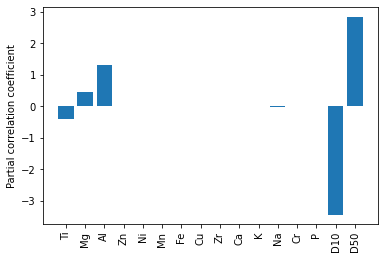

In [66]:
# 绘制柱状图
plt.bar(x=df.index.values,height=r)
plt.xticks(rotation=90)
plt.ylabel("Partial correlation coefficient")
plt.show()

In [46]:
# 建立多元线性回归模型
model = LinearRegression()
model.fit(X, y1)

# 输出回归方程
print("y =", model.intercept_, "+", end=" ")
for i in range(len(model.coef_)):
    print(model.coef_[i], "x_", i+1, "+", end=" ")
print()

y = -1.4284622847902437 + -1.3361905262602858 x_ 1 + 1.402896749233778 x_ 2 + 5.412235341949493 x_ 3 + 0.013402212177183383 x_ 4 + -0.06996469180176028 x_ 5 + -0.04898237702703674 x_ 6 + -0.04102473251891372 x_ 7 + -0.0017956127343127664 x_ 8 + 0.017701307275697128 x_ 9 + -0.09551794174515074 x_ 10 + -0.0014180708237311896 x_ 11 + -0.18783981550106454 x_ 12 + 0.01646078675042642 x_ 13 + 0.024386395470026856 x_ 14 + -1.3873670038295747 x_ 15 + 0.840551008307097 x_ 16 + 


In [47]:
import sklearn.metrics as sm
# 评估当前模型

prd_y = model.predict(X)
print("平均绝对值误差:", sm.mean_absolute_error(y1, prd_y))
print("平均平方误差:", sm.mean_squared_error(y1, prd_y))
print("中位绝对值误差:", sm.median_absolute_error(y1, prd_y))
print("R2得分:", sm.r2_score(y1, prd_y))

平均绝对值误差: 4.2188474935755947e-16
平均平方误差: 2.834968878138011e-31
中位绝对值误差: 2.220446049250313e-16
R2得分: 1.0


In [48]:
# 计算偏相关系数
r = model.coef_ * np.std(X, axis=0) / np.std(y)
print("Partial correlation coefficients:", r)

Partial correlation coefficients: [-8.00997739e-01  8.46692682e-01  2.58516369e+00  1.92615706e-05
 -2.99068985e-04 -1.28031731e-04 -6.93786016e-05 -1.60044668e-06
  2.90919835e-05 -7.19387015e-04 -2.18920828e-06 -3.99226732e-03
  1.46716555e-05  3.36729966e-05 -7.02630529e+00  6.14364107e+00]


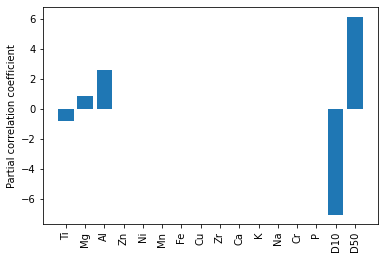

In [49]:
# 绘制柱状图
plt.bar(x=df.index.values,height=r)
plt.xticks(rotation=90)
plt.ylabel("Partial correlation coefficient")
plt.show()

## 题目二

从回归结果可以看出，模型的2值为1，说明模型拟合效果很好。回归系数的正负号表示自变量对因变
呈的影响方向，绝对值表示影响程度。从回归系数可以看出，影响钴酸锂倍率性能的主要因素有：
1、掺杂元素：T、Mg、A三种掺杂元素对倍率性能有正向影响，即掺杂越多，容量保持率越高。这可能
是因为渗杂元素可以提高钴酸锂的电导率和L离子的扩散速率，降低电池的内阻和极化。其中，A元
素的影响最大，Mg和T元素的影响次之。
2、杂质元素：Fe、Cu、Zr、Ca、K、Na、C等杂质元素对倍率性能有负向影响，即杂质越多，容量保持
率低。这可能是因为杂质元素会降低钴酸锂的电导率和L离子的扩广散速率，增加电池的内阻和极
化。其中，Na元素的影响最大，Fe、Cu、Zr、Ca、K、Cr元素的影响次之。
3、粒径：D10和D50两种粒径参数对倍率性能有负向影响，即粒径越大，容量保持率越低。这可能是因
为粒径越大，颗粒表面积越小，L离子的扩散速率越慢，电池的内阻和极化越大。其中，D50参数的
影响大于D10参数。

### 首先，可以计算不同掺杂元素的钴酸锂在不同倍率下的容量保持率，即相对于0.2C时的容量，2C时的容量占多少百分比。例如，根据附表4，参Ti的钴酸锂在0.2C时的容量为208.7mAh/g,在2C时的容量为95.6mAh/g,那么其容量保持率为95.6/208.7*100%=45.8%。
### 然后，可以将不同掺杂元素的钴酸锂在不同倍率下的容量保特率绘制成柱状图或折线图，以直观地比较它们的差异。例如，如下图所示，掺Ti的钴酸锂在各个倍率下的容量保持率都高于其他惨杂元素的钴酸锂，说明其快充性能更好。
### 最后，我们可以看出，掺Ti元素可以显著提高钴酸锂的快充性能。这可能是因为T元素可以提高钴酸锂的电导率和L离子的扩散速率，降低电池的内阻和极化。另外，Ti元素也可以稳定钴酸锂的晶体结构，抑制析氧和结构坍塌的发生。因此，掺Ti元素是一种有效的改性方法，可以提高钴酸锂在高压和高倍率下的电化学性能。

In [50]:
df4.head()

,Bare,Ti-doped,Mg-doped,Al-doped,TMA-doped
0.2C,208.7,208.7,193.4,182.6,210.8
0.5C,121.7,176.1,158.7,141.3,197.8
1C,52.1,143.5,78.2,95.6,171.7
2C,15.2,95.6,21.7,50.1,147.8


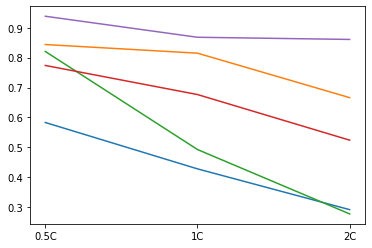

In [51]:
for i in range(df4.shape[0]-2,-1,-1):
    for j in range(df4.shape[1]):
        df4.iloc[i+1,j]=df4.iloc[i+1,j]/df4.iloc[i,j]
for i in range(df4.shape[1]):
    plt.plot(df4.index[1:],df4.iloc[1:,i])

In [52]:
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

model = MLPRegressor(hidden_layer_sizes=(10,), random_state=10,learning_rate_init=0.1)
model.fit(X, y)
pre = model.predict(X)  # 模型预测
np.abs(y-pre).mean()  # 模型评价

0.17520530841844972

In [53]:
# 创建xgb回归模型对象
model = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)

# 训练模型
model.fit(X, y2)

# 预测新数据的结果
y_pred = model.predict(X)

# 评估模型的准确度
score = model.score(X, y)
print("R-squared:", score)

# 计算均方误差和均方根误差
mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

R-squared: -7958847.807535805
MSE: 40073.1220998951
RMSE: 200.18272178161408
